In [27]:
import numpy as np
import pandas as pd

In [28]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [29]:
car_df=pd.read_csv("cars24_clean.csv")
car_df

,cars_name,cars_brand,model_year,kms,gasoliene_type,price
0,Nissan Terrano,Nissan,2015,86374,Petrol,504000
1,Hyundai I20 Active,Hyundai,2015,99330,Diesel,621000
2,Hyundai Eon,Hyundai,2012,31496,Petrol,276000
3,Hyundai Creta,Hyundai,2017,54439,Petrol,935000
4,Skoda Rapid,Skoda,2012,81645,Diesel,438000
...,...,...,...,...,...,...
1645,Maruti Alto 800,Maruti,2014,62921,Petrol,271000
1646,Hyundai Creta,Hyundai,2018,24296,Petrol,1235000
1647,Hyundai Eon,Hyundai,2015,54852,Petrol,216000
1648,Hyundai New Santro,Hyundai,2019,34207,CNG,566000


In [30]:
x=car_df.drop(columns=["price"])
y=car_df[["price"]]

In [5]:
car_df["kms"].max()

122143

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=15)

In [32]:
x_train

,cars_name,cars_brand,model_year,kms,gasoliene_type
904,Hyundai Verna,Hyundai,2016,34108,Petrol
38,Volkswagen Polo,Volkswagen,2018,69629,Petrol
1584,Maruti Dzire,Maruti,2020,45565,Petrol
136,Honda City,Honda,2015,52340,Petrol
1613,Honda Amaze,Honda,2014,36260,Petrol
...,...,...,...,...,...
667,Hyundai Creta,Hyundai,2017,54362,Petrol
156,Hyundai I20,Hyundai,2014,52599,Petrol
384,Ford Ecosport,Ford,2018,35369,Petrol
645,Maruti Ritz,Maruti,2013,75514,Petrol


In [33]:
categorical_features=["cars_name","cars_brand","gasoliene_type","model_year"]
ohe=OneHotEncoder(sparse_output=False,handle_unknown="ignore",drop="first",dtype="int")

In [34]:
from sklearn.preprocessing import KBinsDiscretizer
pow=KBinsDiscretizer(n_bins=10,strategy="uniform",encode="ordinal")

In [35]:
transformer1=make_column_transformer((ohe,[0,1,2,4]),remainder="passthrough")
transformer2=make_column_transformer((pow,[3]),remainder="passthrough")

In [36]:
from sklearn import set_config
set_config(display="diagram")

In [37]:
pipe=Pipeline([
    ("trf1",transformer1),
    ("trf2",transformer2)
])

In [38]:
pipe.fit_transform(x_train)

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        3.4108e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        6.9629e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        4.5565e+04],
       ...,
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        3.5369e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        7.5514e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.3040e+04]])

In [14]:
lr=LinearRegression()

In [39]:
pipe=Pipeline([
    ("trf1",transformer1),
    ("trf2",transformer2),
    ("model",lr)
])

In [40]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype='int',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1, 2, 4])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('kbinsdiscretizer',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=10,
                                                                   strategy='uniform'),
                                                  [3])])),
                ('model', LinearRegression())])

In [41]:
lr.coef_.shape

(1, 112)

In [42]:
lr.intercept_

array([49390.06501383])

In [47]:
y_pred=pipe.predict(x_test).astype("int")
y_pred=pd.DataFrame(y_pred,columns=["pred_price"])
y_pred

,pred_price
0,907799
1,133797
2,640438
3,906885
4,566870
...,...
78,562529
79,920773
80,496137
81,886126


In [457]:
y_test

,price
845,978000
889,260000
1079,625000
449,869000
316,616000
...,...
1391,546000
800,1036000
813,467000
780,953000


In [496]:
import pickle
pickle.dump(pipe,open("Cars24 linear model.pkl",'wb'))

# check:-

In [44]:
dic={"cars_name":"Hyundai i20 Active","cars_brand":"Hyundai","model_year":2011,"kms":1523,"gasoliene_type":"Diesel"}

pipe.predict(pd.DataFrame([dic]))

C:\Users\suman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[552975.58429321]])

# Metrics:-

In [45]:
r2_score(y_pred,y_test)

0.9016324419622844

<AxesSubplot: xlabel='price', ylabel='pred_price'>

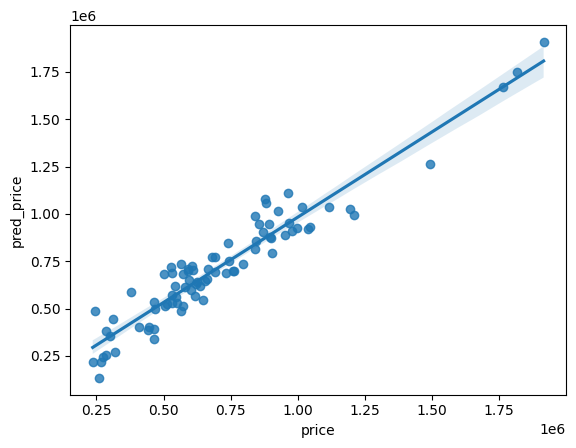

In [49]:
import seaborn as sns
sns.regplot(y=y_pred["pred_price"],x=y_test["price"])

In [479]:
mean_squared_error(y_pred,y_test)

9530362723.72289

In [480]:
mean_absolute_error(y_pred,y_test)

76696.03614457832

In [34]:
# from sklearn.model_selection import KFold
# lr=LinearRegression()
# kfold_validation=KFold(10)

cross_val_score(pipe,x,y,cv=10).mean()



-3.0111037287219226e+21

In [479]:
s=[]
for i in range(50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=i)
    lr=LinearRegression() 
    pipe=make_pipeline(transformer,lr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    sc=r2_score(y_pred,y_test)
    s.append(sc)
    
print(np.argmax(s))
print(s)

15
[0.8613358781488472, 0.787787428202591, 0.8729719936267369, 0.8973487835228114, 0.8416507194768396, 0.8880485043496276, 0.8975139052350857, 0.8741143787698972, 0.8517858393066932, 0.9012927839563972, 0.7877113471040416, 0.8633320092091602, 0.8520447936428817, 0.7685805176056466, 0.8544827914180089, 0.9016323512553138, 0.8128941895655254, 0.8636705922850726, 0.9007704381176846, 0.8154307874578529, 0.8600311772897309, 0.8118460312708969, 0.8467955079748082, 0.8751414111633995, 0.7881216396319214, 0.8549252360473343, 0.892414425207492, 0.8457934273762827, 0.8872973229101822, 0.7861735527649549, 0.8514558594679341, 0.8231454152888321, 0.862849069162702, 0.8628958700625048, 0.8677783071039401, 0.8901233799624011, 0.8759906637795136, 0.8130624411210596, 0.8955220255571879, 0.8215740927176516, 0.746233704963176, 0.8474220798420911, 0.8418463843735783, 0.8319789737229426, 0.6973370677204984, 0.8455727648878305, 0.8572741970524362, 0.8426493975866725, 0.8389149590950595, 0.8409967246062136]


In [480]:
s[15]

0.9016323512553138

In [738]:
accuracy_score(y_test,y_pred)

0.0